## **1) Les données sur les éoliennes**
### **a) Travail introductif sur la base de données**

Dans un premier temps, nous souhaitons décrire la répartition du parc éolien sur le territoire national (métropole seulement). Pour ce faire, nous allons créer une carte de la France et y afficher la position des éoliennes. 

In [2]:
import pandas as pd
import numpy as np

On télécharge les données du Ministère de la Transition Ecologique et de la Cohésion des Territoires.

(https://www.georisques.gouv.fr/donnees/bases-de-donnees/eolien-terrestre)

In [14]:
df = pd.read_csv("eolien.csv", sep=";")

In [27]:
df.head()

,id_aerogenerateur,id_parc,code_insee,nom_commune,code_dept,code_reg,puissance,hauteur_totale,hauteur_mat_nacelle,diametre_rotor,...,type_feu_desc,date_mise_en_service,constructeur,reference_modele,x_aerogenerateur,y_aerogenerateur,epsg,libelle,date_maj,nom_eolienne
0,0005503449_E1,5503449,35068,CHATEAUBOURG,35,53,1.0,99.7,73.0,53.0,...,NaN,2011-04-23,ENERCON,E-53,371155.00,6786614.0,2154,Lambert-93,2022-05-19,NaN
1,0005306849_E1,5306849,50363,MOYON VILLAGES,50,28,2.3,124.0,83.0,82.0,...,NaN,2014-04-01,ENERCON,E-82 E2,395860.28,6887806.5,2154,Lambert-93,2022-05-31,NaN
2,0005306849_E2,5306849,50363,MOYON VILLAGES,50,28,2.3,124.0,83.0,82.0,...,NaN,2014-04-01,ENERCON,E-82 E2,395830.44,6886987.0,2154,Lambert-93,2022-05-31,NaN
3,0005306849_E3,5306849,50363,MOYON VILLAGES,50,28,2.3,124.0,83.0,82.0,...,NaN,2014-04-01,ENERCON,E-82 E2,395760.56,6886064.0,2154,Lambert-93,2022-05-31,NaN
4,0003102050_E1,3102050,16317,ST FRAIGNE,16,75,3.6,180.0,119.0,126.0,...,NaN,NaT,VESTAS,V126-3.6MW,463180.00,6547301.0,2154,Lambert-93,2022-06-22,NaN


Ces données décrivent la position ainsi que certaines caractéristiques des éoliennes. Parmi ces caractérisques, celles qui nous intéressent dans notre objectif de prédiction de la production sont: la longueur des pale et le diamètre du rotor. La position des éoliennes nous permettra quant à elle d'associer chaque éolienne au vent auquel elle fait face. Dans la production d'énergie éolienne, le vent est évidemment la variable explicative la plus importante.

On convertit la colonne date_mise_en_service afin d'avoir des dates dans un format plus facilement interprétable.

In [16]:
import datetime

df.date_mise_en_service = pd.to_datetime((df.date_mise_en_service))

In [29]:
df['date_mise_en_service'].head()

0   2011-04-23
1   2014-04-01
2   2014-04-01
3   2014-04-01
4          NaT
Name: date_mise_en_service, dtype: datetime64[ns]

In [7]:
df.count()

id_aerogenerateur        7483
id_parc                  7483
code_insee               7483
nom_commune              7483
code_dept                7483
code_reg                 7483
puissance                7483
hauteur_totale           7483
hauteur_mat_nacelle      7483
diametre_rotor           7483
cote_ngf                 7483
periode_allumage_lib     7483
periode_allumage_desc       0
type_feu_lib             7483
type_feu_desc               0
date_mise_en_service     4331
constructeur             7483
reference_modele         7483
x_aerogenerateur         7483
y_aerogenerateur         7483
epsg                     7483
libelle                  7483
date_maj                 7483
nom_eolienne              347
dtype: int64

Nos données décrivent 7483 éoliennes. Néanmoins, la date de mise en service n'est précisée que pour 4331 d'entre elles. Cela représente 58% de la base de données. 

### **b) Description avec geopanda**

Nous convertissons nos données afin qu'elles soient exploitables par geopandas

In [7]:
!pip install pandas fiona shapely pyproj rtree  #Sur colab, sinon bug
# A faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales

!pip install contextily
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 15.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 12.3 MB/s eta 0:00:00


In [13]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug

ModuleNotFoundError: No module named 'contextily'

On crée la variable geometry qui nous permettra de manipuler la position des éoliennes plus simplement.

In [10]:
from shapely.geometry import Point
geometrie = [Point(xy) for xy in zip(df.x_aerogenerateur,df.y_aerogenerateur)] # colonnes du DataFrame résultants
caract_eoliennes = gpd.GeoDataFrame(df,geometry=geometrie)
caract_eoliennes = caract_eoliennes.set_crs(2154, allow_override=True)

In [11]:
caract_eoliennes.head()

,id_aerogenerateur,id_parc,code_insee,nom_commune,code_dept,code_reg,puissance,hauteur_totale,hauteur_mat_nacelle,diametre_rotor,...,date_mise_en_service,constructeur,reference_modele,x_aerogenerateur,y_aerogenerateur,epsg,libelle,date_maj,nom_eolienne,geometry
0,0005503449_E1,5503449,35068,CHATEAUBOURG,35,53,1.0,99.7,73.0,53.0,...,2011-04-23,ENERCON,E-53,371155.00,6786614.0,2154,Lambert-93,2022-05-19,NaN,POINT (371155.000 6786614.000)
1,0005306849_E1,5306849,50363,MOYON VILLAGES,50,28,2.3,124.0,83.0,82.0,...,2014-04-01,ENERCON,E-82 E2,395860.28,6887806.5,2154,Lambert-93,2022-05-31,NaN,POINT (395860.280 6887806.500)
2,0005306849_E2,5306849,50363,MOYON VILLAGES,50,28,2.3,124.0,83.0,82.0,...,2014-04-01,ENERCON,E-82 E2,395830.44,6886987.0,2154,Lambert-93,2022-05-31,NaN,POINT (395830.440 6886987.000)
3,0005306849_E3,5306849,50363,MOYON VILLAGES,50,28,2.3,124.0,83.0,82.0,...,2014-04-01,ENERCON,E-82 E2,395760.56,6886064.0,2154,Lambert-93,2022-05-31,NaN,POINT (395760.560 6886064.000)
4,0003102050_E1,3102050,16317,ST FRAIGNE,16,75,3.6,180.0,119.0,126.0,...,NaT,VESTAS,V126-3.6MW,463180.00,6547301.0,2154,Lambert-93,2022-06-22,NaN,POINT (463180.000 6547301.000)


On affiche la position de nos éoliennes sans fond de carte, en l'occurence nous allons ajouter comme fond de carte la carte de la métropole française.

In [12]:
fig,ax = plt.subplots(figsize=(10, 10))
caract_eoliennes.plot(ax = ax, color = 'red', alpha = 0.2, zorder=2)

NameError: name 'plt' is not defined

On rajoute désormais le fond de carte grâce au package Cartiflette.

In [12]:
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.23.26 requires urllib3<1.27,>=1.25.4, but you have urllib3 1.22 which is incompatible.
boto3 1.26.13 requires botocore<1.30.0,>=1.29.13, but you have botocore 1.23.26 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
from cartiflette.download import get_vectorfile_ign

Cartiflette nous permet de télécharger les données geospatiales qui décrivent le contour de la métropole et de ses régions.

In [15]:
france = get_vectorfile_ign(
    field="metropole",
    level="REGION",
    year=2022)

https://wxs.ign.fr/x02uy2aiwjo9bm8ce5plwqmr/telechargement/prepackage/ADMINEXPRESS_SHP_WGS84G_PACK_2022-06-21$ADMIN-EXPRESS_3-1__SHP__FRA_WM_2022-06-21/file/ADMIN-EXPRESS_3-1__SHP__FRA_WM_2022-06-21.7z


Downloading: : 563MiB [03:12, 3.06MiB/s] 
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [16]:
france = france[0:13] #On retire les outre-mers de la carte
france.head()

,ID,NOM_M,NOM,INSEE_REG,geometry
0,REGION_FXX_0000000000001,ILE-DE-FRANCE,Île-de-France,11,"POLYGON ((2.85612 49.07009, 2.85616 49.07011, ..."
1,REGION_FXX_0000000000002,CENTRE-VAL DE LOIRE,Centre-Val de Loire,24,"POLYGON ((1.70924 48.57802, 1.70934 48.57801, ..."
2,REGION_FXX_0000000000003,BOURGOGNE-FRANCHE-COMTE,Bourgogne-Franche-Comté,27,"POLYGON ((5.40561 47.64813, 5.40490 47.64851, ..."
3,REGION_FXX_0000000000004,NORMANDIE,Normandie,28,"MULTIPOLYGON (((-1.51486 48.66017, -1.51483 48..."
4,REGION_FXX_0000000000005,HAUTS-DE-FRANCE,Hauts-de-France,32,"POLYGON ((2.80921 49.09753, 2.80762 49.09682, ..."


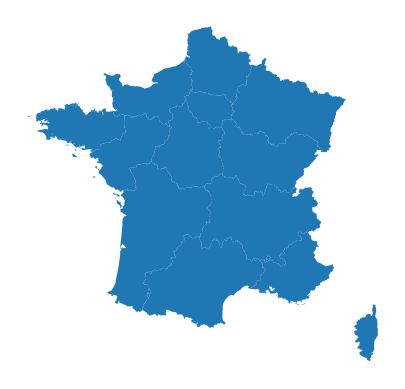

In [17]:
ax = france.plot()
ax.set_axis_off()

Enfin, nous ajoutons les éoliennes sur notre carte de France.

<AxesSubplot: >

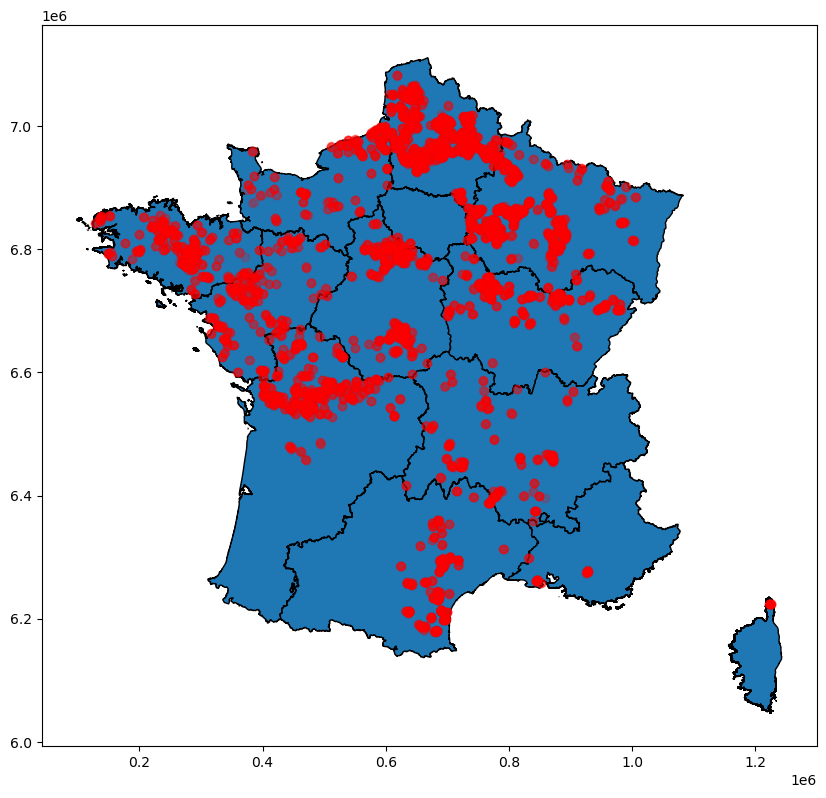

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))
caract_eoliennes.plot(ax = ax, color = 'red', alpha = 0.2, zorder=2)
france.to_crs(2154).plot(ax = ax, zorder=1, edgecolor = "black")

### **c) Prise en compte de l'évolution du parc éolien dans le temps**

Nos données contiennent la date de mise en service de chaque éolienne. Cela nous permet d'aller plus loin que la simple description spatiale du parc éolien à un instant "t". Nous pouvons décrire l'évolution du parc éolien dans le temps.

In [19]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Dans un premier temps, nous affichons les 3152 éoliennes pour lesquelles nous ne connaissons pas leur date de mise en service. Comme nous l'avons dit, ces dernières représentent 42% du parc éolien. 

<AxesSubplot: >

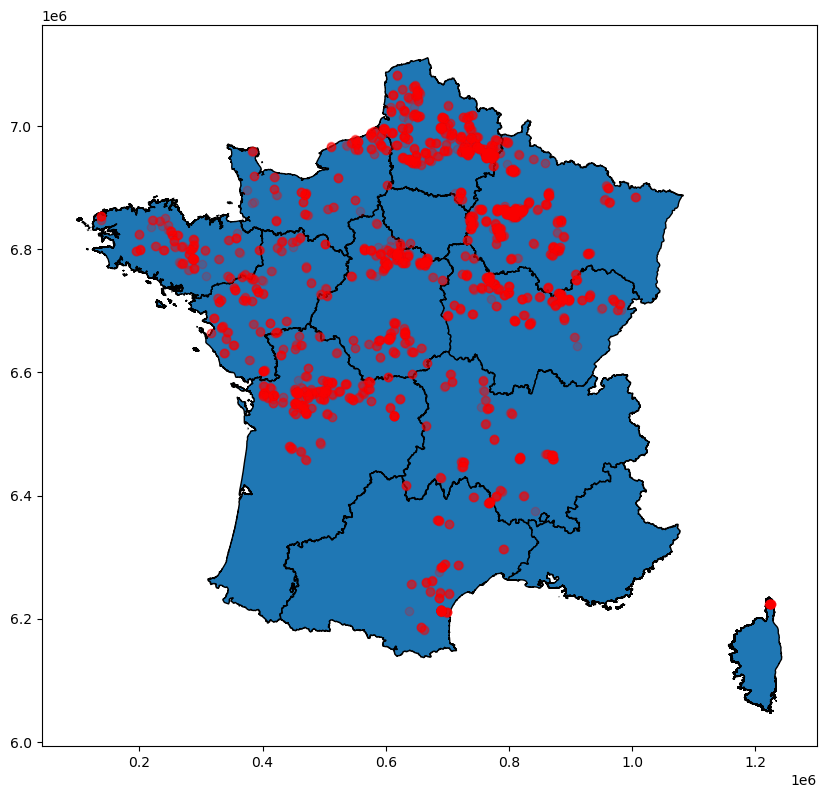

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
france.to_crs(2154).plot(ax = ax, zorder=1, edgecolor = "black")
caract_eoliennes[caract_eoliennes.date_mise_en_service.isna()].plot(ax = ax, color = 'red', alpha = 0.2, zorder=2)

Pour celles dont nous connaissons la date, nous affichons l'évolution du parc d'éolienne en fonction du temps.

In [21]:
periode = pd.Series(pd.date_range("2010", freq="Y", periods=14))


from ipywidgets import interact

def signal_plot(annee):
    fig, ax = plt.subplots(figsize=(10,10))
    france.to_crs(2154).plot(ax = ax, zorder=1, edgecolor = "black")
    # Plot les éoliennes
    caract_eoliennes[caract_eoliennes.date_mise_en_service < annee].plot(ax = ax, color = 'red', alpha = 0.2, zorder=2)   
    
interact(signal_plot,
            annee=periode)

interactive(children=(Dropdown(description='annee', options=(Timestamp('2010-12-31 00:00:00'), Timestamp('2011…

<function __main__.signal_plot(annee)>

En affichant celle dont on ne connait pas la date de mise en service en vert on obtient ce graphique :

In [22]:
periode = pd.Series(pd.date_range("2010", freq="Y", periods=14))



from ipywidgets import interact


def signal_plot(annee):
    fig, ax = plt.subplots(figsize=(10,10))
    france.to_crs(2154).plot(ax = ax, zorder=1, edgecolor = "black")
    # Plot les éoliennes
    caract_eoliennes[caract_eoliennes.date_mise_en_service.isna()].plot(ax = ax, color = 'green', alpha = 0.2, zorder=2)  
    caract_eoliennes[caract_eoliennes.date_mise_en_service < annee].plot(ax = ax, color = 'red', alpha = 0.2, zorder=2)  

interact(signal_plot,
            annee=periode)

interactive(children=(Dropdown(description='annee', options=(Timestamp('2010-12-31 00:00:00'), Timestamp('2011…

<function __main__.signal_plot(annee)>

## **2) Les données météorologiques**

Nos données météorologiques provinnent d'une API (https://open-meteo.com/en). Elle nous permet d'avoir la vitesse moyenne (sur 10mn) du vent, heure par heure.


In [20]:
import json
import requests

Nous donnons un exemple d'utilisation de l'API pour récupérer les données de vent à une latitude/longitude et date données.

In [22]:
base_url = "https://archive-api.open-meteo.com/v1/era5?"
latitude=str(52.52)
longitude=str(13.41)
start_date="2022-06-08"
end_date="2012-12-04"
complete_url = base_url + "latitude=" + latitude + "&longitude=" + longitude + "&hourly=windspeed_10m&windspeed_unit=ms&start_date="+start_date+"&end_date="+end_date

reponse = requests.get(complete_url)
print(reponse.content)

b'{"error":true,"reason":"End-date must be larger or equals than start-date"}'


### **a) Un exemple simple**

Maintenant que nous avons montré comment fonctionnait l'API, nous montrons comment nous allons nous servir de ces données météorologiques en prenant l'exemple de la première éoliennes de notre base de données. 

Ainsi, dans un premier temps, nous récupérons les données de vent pour cette éolienne précisément.

In [25]:
caract_eoliennes = caract_eoliennes.to_crs(4326)

In [26]:
a = caract_eoliennes.geometry[0]
print(a)
print(a.x)

POINT (-1.4197135477946279 48.09705051237692)
-1.4197135477946279


In [27]:
latitude=str(a.y)
longitude=str(a.x)
start_date=str(pd.to_datetime(caract_eoliennes.date_mise_en_service[0]).date())
print(start_date)
end_date="2022-12-04"

2011-04-23


In [24]:
complete_url = base_url + "latitude=" + latitude + "&longitude=" + longitude + "&hourly=windspeed_10m&windspeed_unit=ms&start_date="+start_date+"&end_date="+end_date


import json
json.rep = requests.get(complete_url).json()

In [26]:
donnees_vent = pd.DataFrame(json.rep['hourly'])

donnees_vent['time'] = pd.to_datetime(donnees_vent['time'])
donnees_vent = donnees_vent.set_index('time')

donnees_vent.head()

KeyError: 'hourly'

Pour cette éolienne, nous traçons la série temporelle du vent (vitesse moyenne sur 10mn heure par heure).

<AxesSubplot: xlabel='time'>

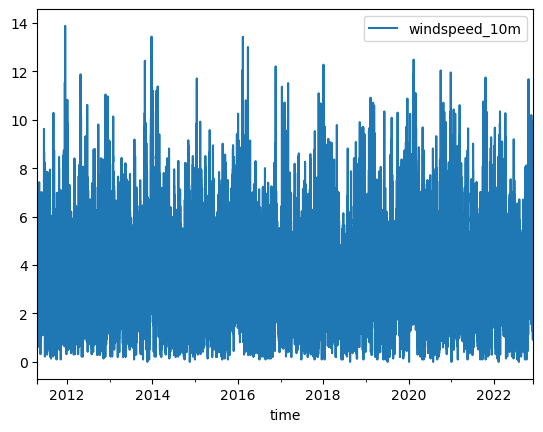

In [30]:
donnees_vent.plot()

On affiche également les moyennes de vent par an et par mois.

<AxesSubplot: xlabel='time'>

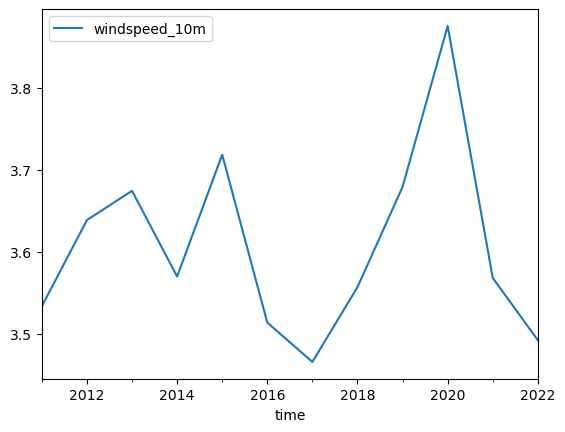

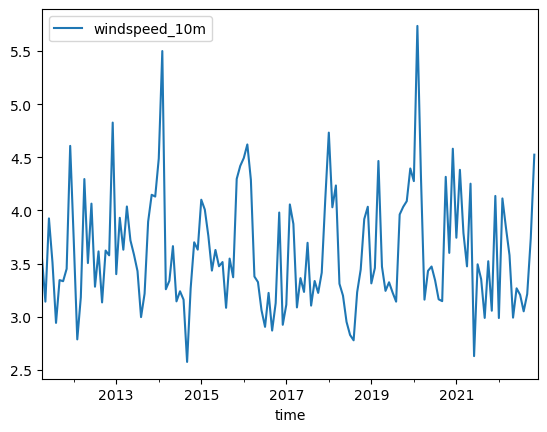

In [31]:
donnees_vent.resample('Y').mean().plot()
donnees_vent.resample('M').mean().plot()


Afin de calculer la production éléctrique (estimée) d'une éolienne à partir du vent qu'elle reçoit nous avons besoin de quelques notions de physique. 

La puissance d'une éolienne est donnée par $P = 1/2 \rho S V^3$ où $V$ est la vitesse du vent et $S = \pi/4 d^2$ est la surface de brassage de l'éolienne avec $d$ le diamètre du rotor. 
Nous avons accès dans nos données à la longueur des pâles des éoliennes donc nous pouvons retrouver la puissance de l'éolienne.
L'énergie fournie sur une heure est donc cette puissance multipliée par le temps. Pour une éolienne, on peut considérer un facteur de charge de 16/27 (limite de Betz). Nous allons le prendre en compte pour calculer l'énergie fournie par une éolienne. 
Nous pourrions aller plus loin en prenant en compte la température et la pression qui influent sur la masse volumique de l'air $\rho$ et peuvent conduire à une variation de l'ordre de 20%.
Il serait également intéressant de regarder à la moyenne du vent par mois.

Nous créons une fonction qui calcule l'énergie produite (estimée) et nous affichons la série temporelle de cette énergie produite pour l'éolienne considérée dans cette exemple.

In [32]:
rho_air = 1.2

def calcul_energie(diametre_rotor,vitesse_vent):
    return 16/27/2 * rho_air * np.pi/4 * longueur_pale**2 * np.power(vitesse_vent,3)

In [33]:
diametre_rotor = caract_eoliennes['diametre_rotor'][0]
longueur_pale = caract_eoliennes['hauteur_totale'][0] - caract_eoliennes['hauteur_mat_nacelle'][0] # Je crois (Julien)

In [34]:
donnees_vent['energie'] = calcul_energie(diametre_rotor,donnees_vent['windspeed_10m'])

<AxesSubplot: xlabel='time'>

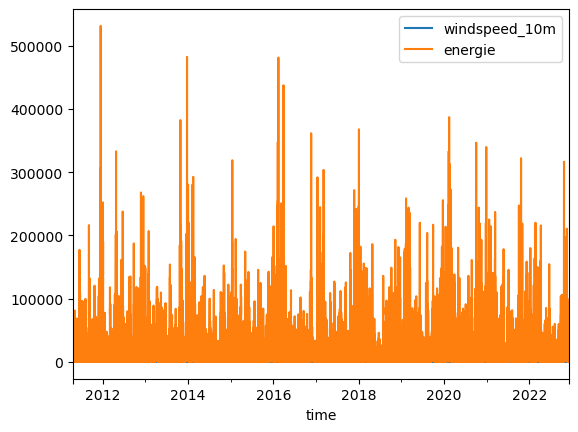

In [35]:
donnees_vent.plot()

Ce qui donne en moyennes mensuelles:

<AxesSubplot: xlabel='time'>

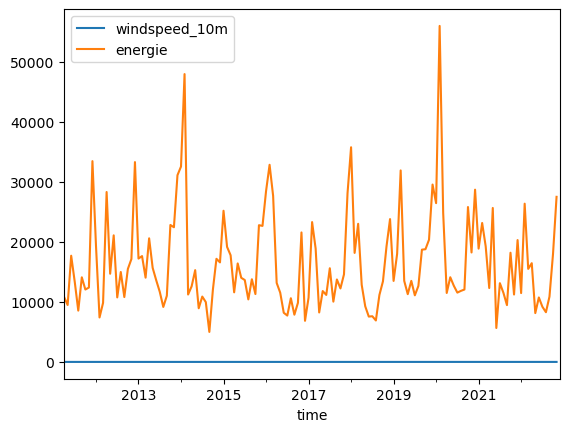

In [36]:
donnees_vent.resample('M').mean().plot()

### **b) Généralisation à toutes les éoliennes**

Désormais, nous allons réaliser ces étapes pour chacune de nos éoliennes.

In [32]:
#Le code est long à tourner

import csv

caract_eoliennes = caract_eoliennes.to_crs(4326)

base_url = "https://archive-api.open-meteo.com/v1/era5?"

end_date="2022-12-04"

fichier_csv = open('/home/onyxia/work/ProjPython2A/donnees_vent.csv','w',newline='')

writer = csv.writer(fichier_csv)

for eolienne in caract_eoliennes.itertuples():
    a = eolienne.geometry
    longitude=str(a.x)
    latitude=str(a.y)
    date = pd.to_datetime(eolienne.date_mise_en_service).date()
    if pd.isnull(date):
        start_date = "2021-11-04" #On prend arbitrairement 1 an de météo
    else:
        start_date=str(date)
    complete_url = base_url + "latitude=" + latitude + "&longitude=" + longitude + "&hourly=windspeed_10m&windspeed_unit=ms&start_date="+start_date+"&end_date="+end_date
    reponse = requests.get(complete_url)
    donnees_vent_eolienne = pd.DataFrame(reponse.json())['hourly']
    if eolienne.Index%50 == 0 : 
        print(eolienne.Index)
    donnees_vent_eolienne['time'] = pd.to_datetime(donnees_vent_eolienne['time'])
    writer.writerow([eolienne.Index,donnees_vent_eolienne['time'],donnees_vent_eolienne['windspeed_10m'])


SyntaxError: invalid syntax (<ipython-input-32-0494d375de8a>, line 30)

In [ ]:
caract_eoliennes.head()

In [41]:
import os
os.getcwd()

'/home/onyxia/work/ProjPython2A/cartogether'